## EDA


Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
import operator

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./train.csv")
df.head()

<IPython.core.display.Javascript object>

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# df.info();

In [5]:
pd.set_option('max_columns', 100)
df.describe()

# df.describe(include = 'all')
# spot outliers 

<IPython.core.display.Javascript object>

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df = df.drop('Id',axis=1)

df.head()

KeyError: "['Id'] not found in axis"

In [10]:
df.MSSubClass = df.MSSubClass.astype("object")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# Categorical vs Numerical 

numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))



Number of Numerical features:  37
Number of Categorical features:  43


In [12]:
print(df[numerical_feats].columns)
print("*"*100)
print("*"*100)
print("*"*100)
print(df[categorical_feats].columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSl

In [24]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

## Missing Values

In [26]:
def nan_counter(df):
    
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    print(missing_data.head(10))
    
nan_counter(df)

<IPython.core.display.Javascript object>

              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945


## Filling NaNs
For 4 columns there's an overwhelming amount of NaNs.
But the description suggests that it is not missing data:
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [27]:
cols_NAs_meaniningful = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_NAs_meaniningful:
    df[col].fillna('None',inplace=True)
    
nan_counter(df)

<IPython.core.display.Javascript object>

              Total    Percent
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
MasVnrArea        8   0.547945
MSSubClass        0   0.000000
KitchenAbvGr      0   0.000000
GarageType        0   0.000000
FireplaceQu       0   0.000000
Fireplaces        0   0.000000
Functional        0   0.000000
TotRmsAbvGrd      0   0.000000


In [28]:
df.fillna(df.mean(), inplace=True)
nan_counter(df)

<IPython.core.display.Javascript object>

              Total  Percent
MSSubClass        0      0.0
MSZoning          0      0.0
GarageYrBlt       0      0.0
GarageType        0      0.0
FireplaceQu       0      0.0
Fireplaces        0      0.0
Functional        0      0.0
TotRmsAbvGrd      0      0.0
KitchenQual       0      0.0
KitchenAbvGr      0      0.0


In [30]:
df.isnull().sum().sum()

0

Method to the madness of data visualization 


### Relationship
1. Scatter plot using Matplotlib
2. Marginal Histogram
3. Scatter plot using Seaborn
4. Pair Plot in Seaborn
5. Heat Map


### Data over Time
6. Line Chart
7. Area Chart
8. Stack Area Chart
9. Area Chart Unstacked



### Ranking
10. Vertical Bar Chart
11. Horizontal Bar Chart
12. Multi-set Bar Chart
13. Stack Bar Chart
14. Lollipop Chart



### Distribution
15. Histogram
16. Density Curve with Histogram
17. Density Plot
18. Box Plot
19. Strip Plot
20. Violin Plot
21. Population Pyramid



### Comparisons
22. Bubble Chart
23. Bullet Chart
24. Pie Chart
25. Net Pie Chart
26. Donut Chart
27. TreeMap
28. Diverging Bar
29. Choropleth Map
30. Bubble Map


## Categorical Features 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

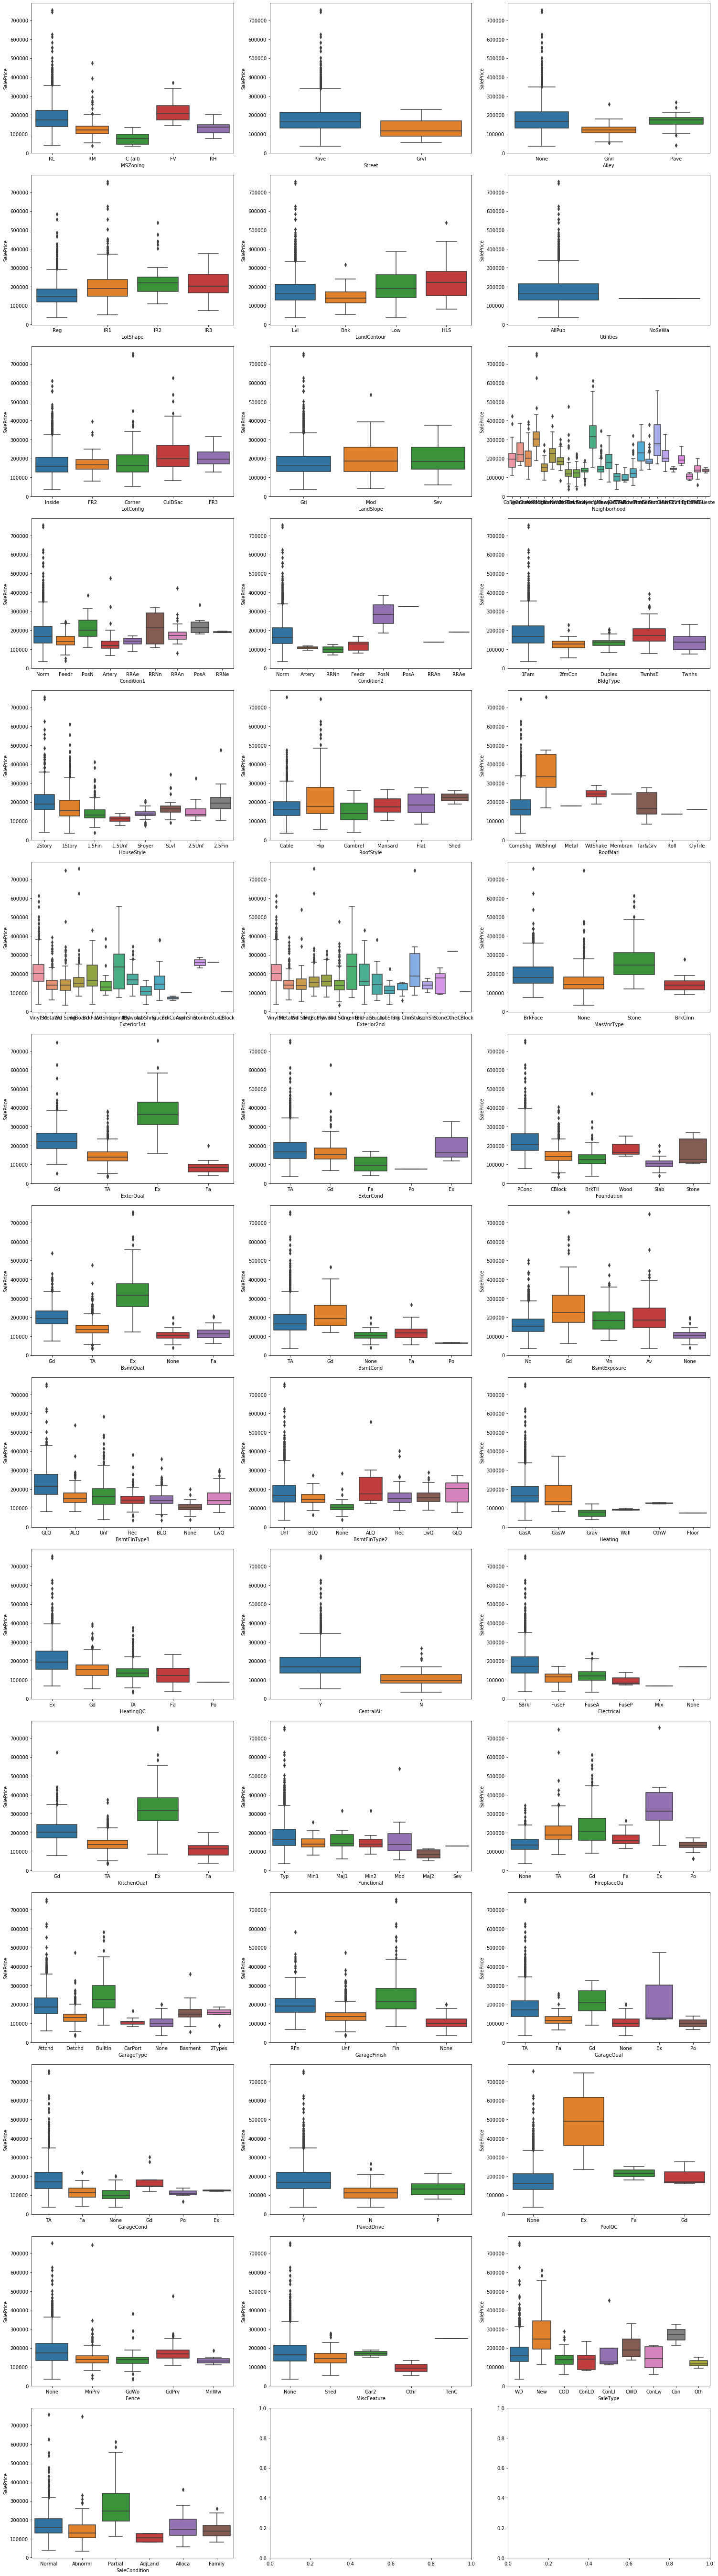

In [31]:
# Box Plots

li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df['SalePrice'], data=df.drop('SalePrice',axis=1), ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


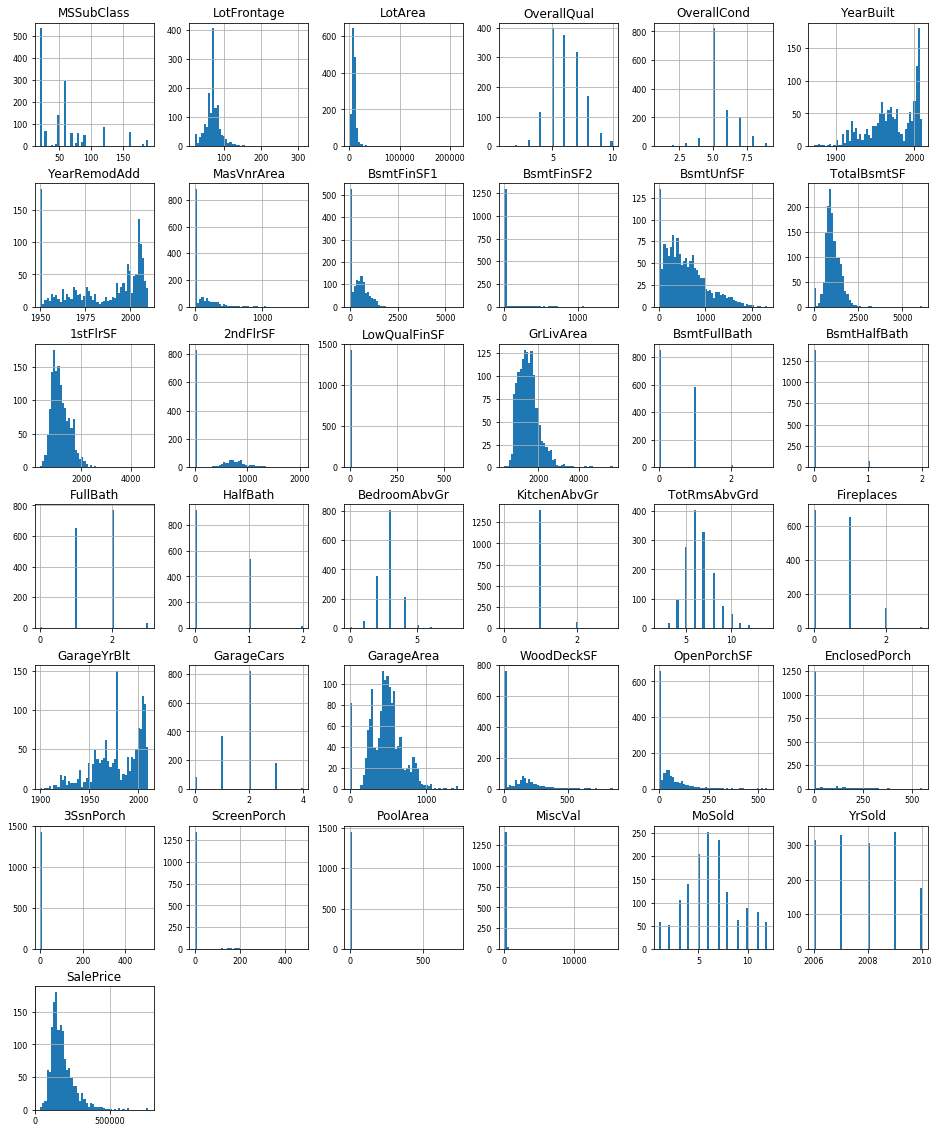

In [32]:
# creating a new df that has only numerical columns
df_num = df.select_dtypes(include=['float64','int64'])


# df_num.describe()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

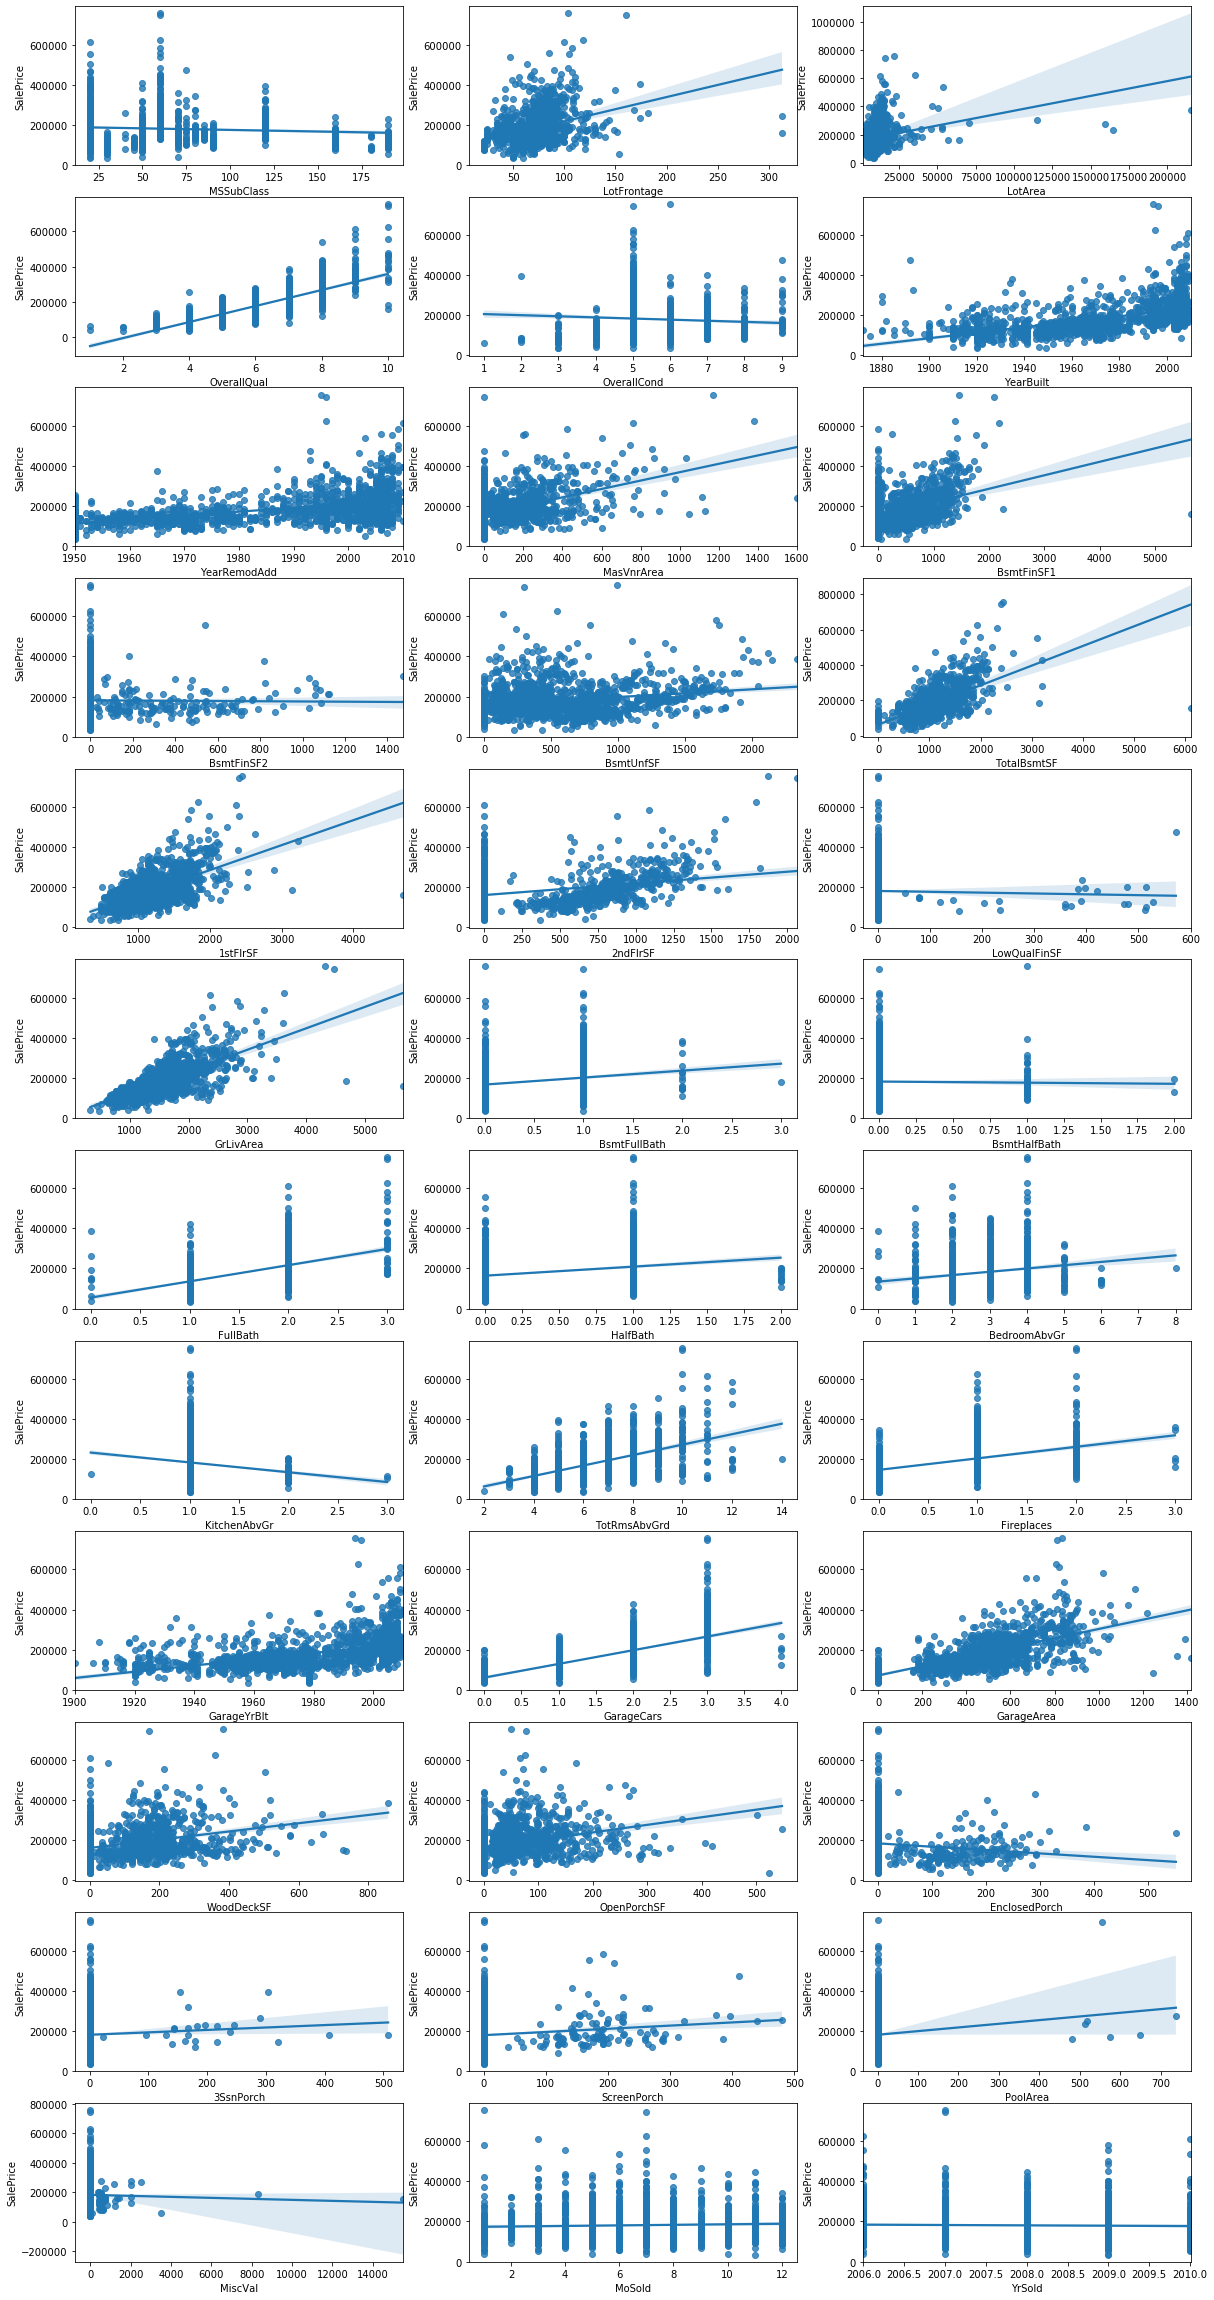

In [33]:
numerical_cols = list(df_num.drop('SalePrice',axis=1).columns.tolist())
#13,9
plt.figure(figsize = (20, 45))

for i,col in enumerate(numerical_cols) :

    plt.subplot(13,3,i+1)
    sns.regplot(x=(df_num[col]),y='SalePrice', data = df_num)
            
plt.show()   

### Price

### Effect of normalization on the distribution of price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/nikhil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: F

<IPython.core.display.Javascript object>

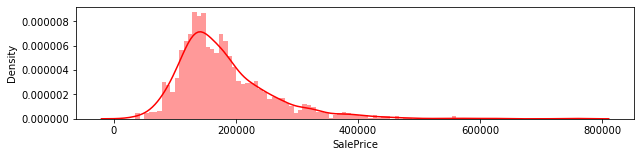

Measure of skewness: 1.8828757597682129


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/nikhil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: F

<IPython.core.display.Javascript object>

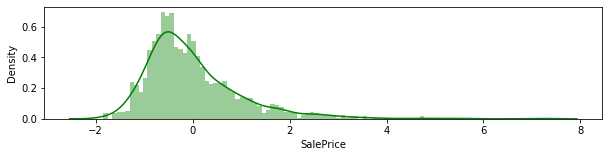

Measure of skewness: 1.8828757597682129


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/nikhil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: F

<IPython.core.display.Javascript object>

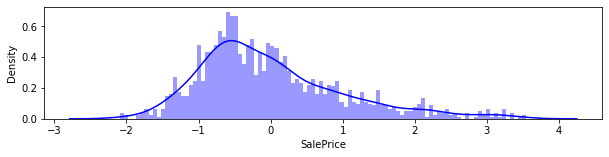

Measure of skewness: 1.0016835845982468


In [34]:
price = df_num['SalePrice']
plt.figure(figsize=(10,7))
plt.subplot(311)
sns.distplot(price, color='r', bins=100, hist_kws={'alpha': 0.4});
plt.show()
print("Measure of skewness: {}".format(df_num['SalePrice'].skew()))


# normalized and with outliers
x = df_num['SalePrice']
price_all =  (x-x.mean())/x.std()

plt.figure(figsize=(10,7))
plt.subplot(312)
sns.distplot(price_all, color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()
print("Measure of skewness: {}".format(price_all.skew()))

# # normalized and outliers removed

x = df_num['SalePrice']
x = x[np.abs(x-x.mean()) <= (3*x.std())]
price_balanced =  (x-x.mean())/x.std()

plt.figure(figsize=(10,7))
plt.subplot(313)
sns.distplot(price_balanced, color='b', bins=100, hist_kws={'alpha': 0.4});
plt.show()

print("Measure of skewness: {}".format(price_balanced.skew()))



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/nikhil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/nikhil/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: F

<IPython.core.display.Javascript object>

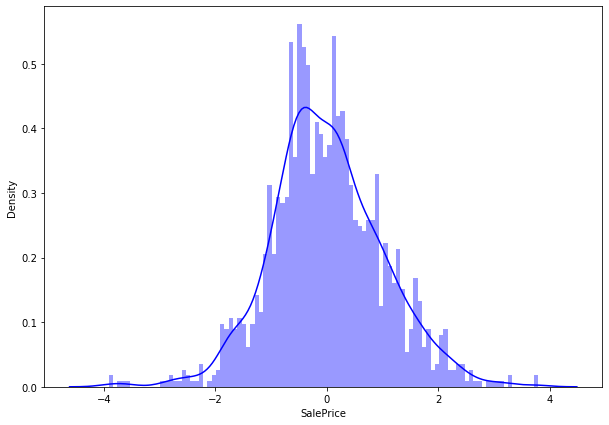

Measure of skewness: 0.1213350622052098


In [35]:
# Log transformation without removing outliers
x = np.log(df_num['SalePrice'])

# normalization
x =(x-x.mean())/x.std()

# plotting
plt.figure(figsize=(10,7))
sns.distplot(x, color='b', bins=100, hist_kws={'alpha': 0.4});
plt.show()
print("Measure of skewness: {}".format(x.skew()))

## Quantitative Corelations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

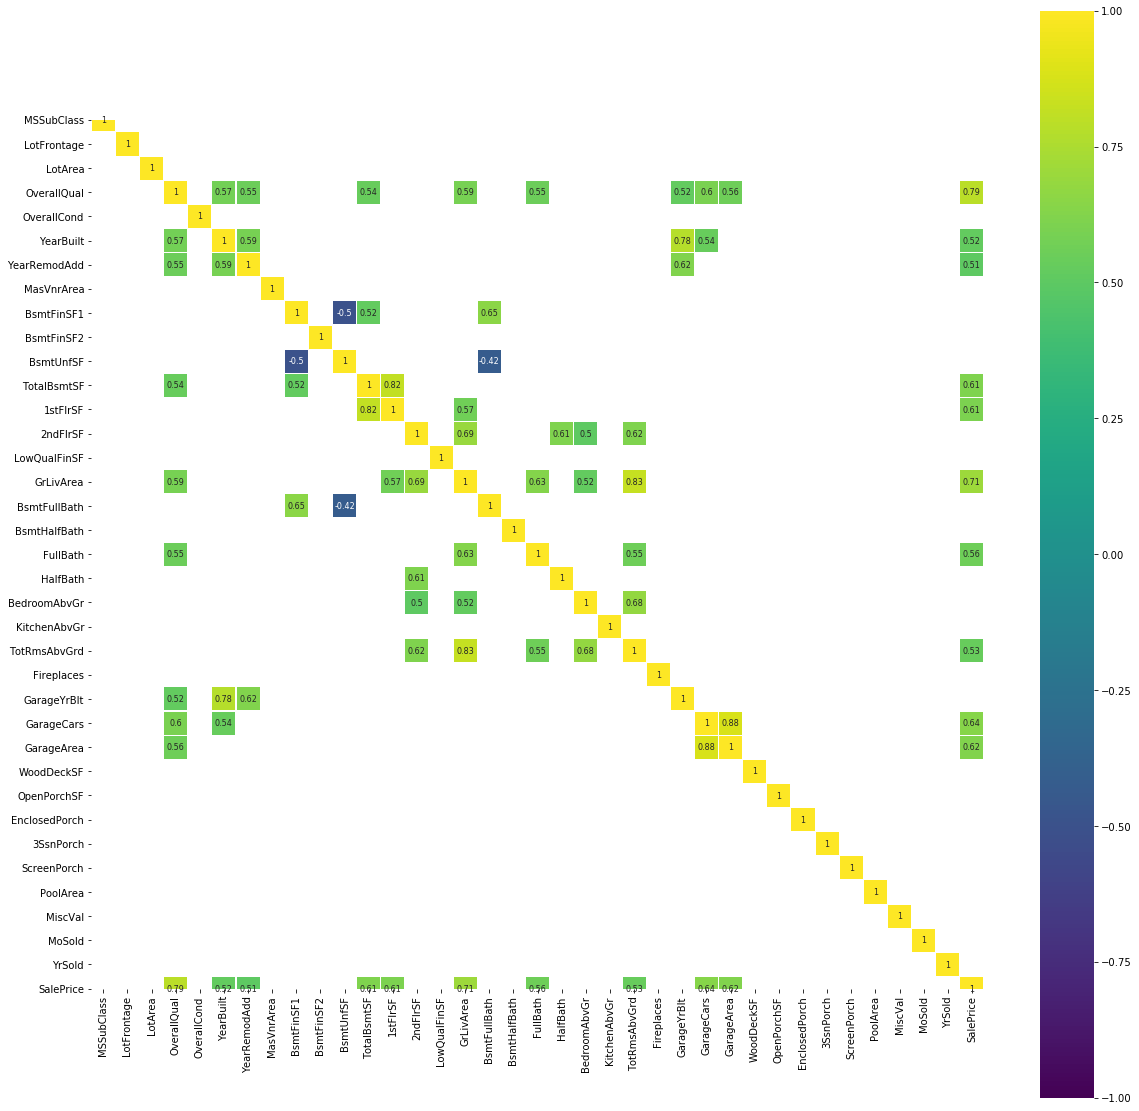

In [36]:
# naive way 
corr = df_num.corr()

# corr
plt.figure(figsize=(20, 20))


sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [37]:
# 
df_num_corr = df_num.corr()['SalePrice'][:-1]
best_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

print("There are {} strongly correlated values with SalePrice:\n{}".format(len(best_features_list), best_features_list))

There are 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

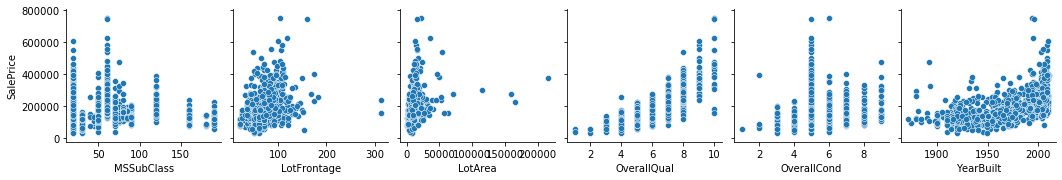

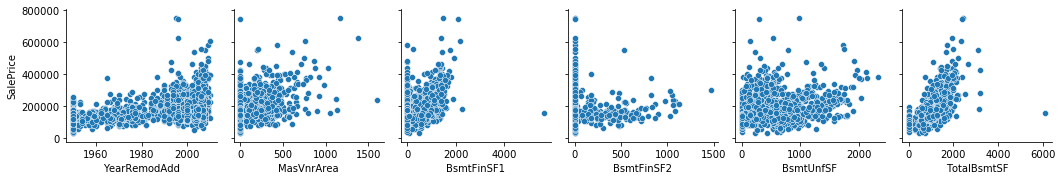

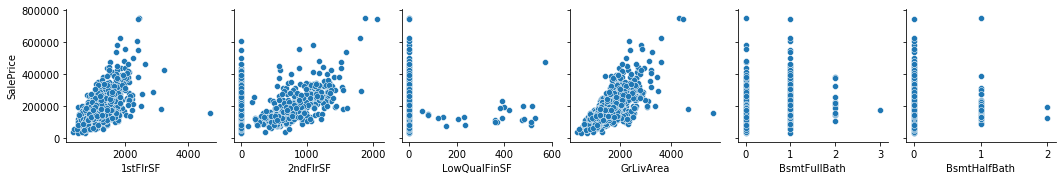

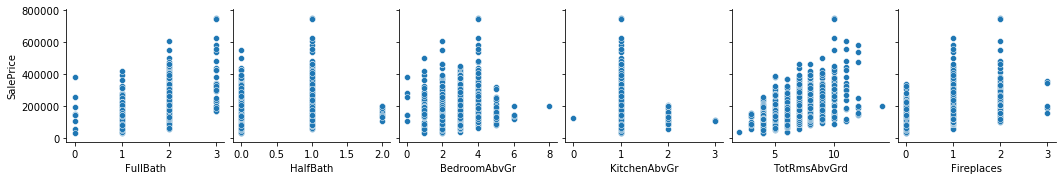

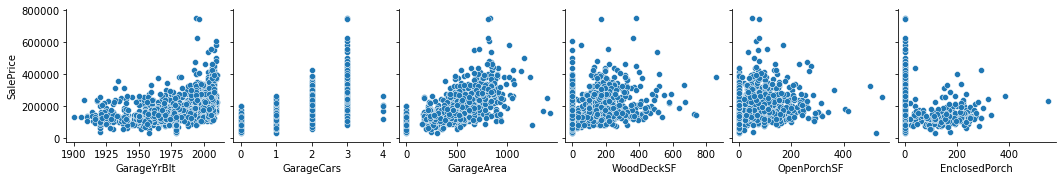

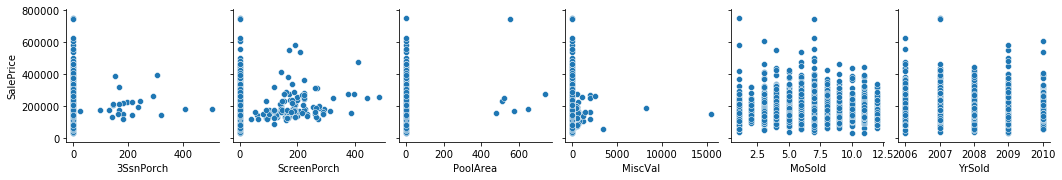

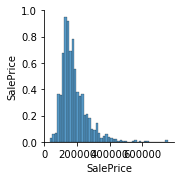

In [38]:
for i in range(0, len(df_num.columns), 6):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+6],
                y_vars=['SalePrice']);

In [39]:
# a lot of columns have data points located at x=0 which in our case represents the absence of the feature 

single_feature = []

for i in range(0, len(df_num.columns) - 1):
    
    x_df = df_num[[df_num.columns[i], 'SalePrice']]
    x_df = x_df[x_df[df_num.columns[i]] != 0]
    single_feature.append(x_df)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in single_feature}

# # sorted operation on dict converts it into a list of sorted key val pairs
# all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))

for key in all_correlations.keys():
    if all_correlations[key] > 0.5:
        if key not in best_features_list:
            print("{:>15}: {:>15}".format(key, all_correlations[key]))
        

       2ndFlrSF: 0.6733048324568376


We found 11 correlated features.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

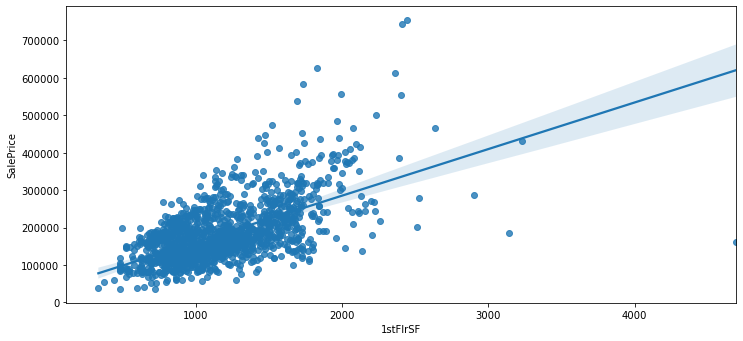

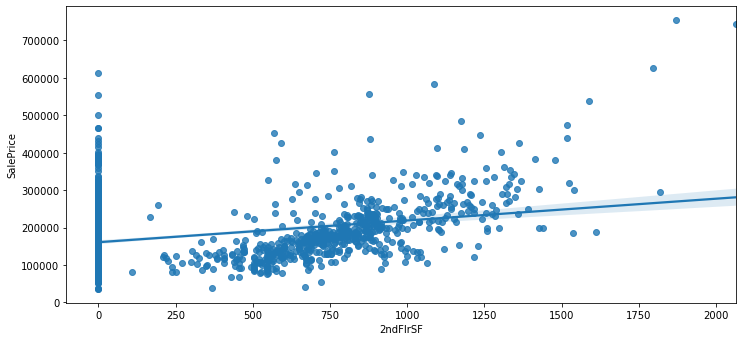

In [40]:
# the curious case of floors 
micro_df = df[['1stFlrSF',"2ndFlrSF","SalePrice"]]


# fig, ax = plt.subplots(121, 3, )

for i,k in enumerate(['1stFlrSF',"2ndFlrSF"]):
    plt.figure(figsize = (12, 12))
    plt.subplot(2,1,i+1)
    sns.regplot(x=micro_df[k],y='SalePrice', data = micro_df)

<ipython-input-41-b66f4ac8ead8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_df["more_than_1_floor"] = micro_df['2ndFlrSF']>0
<ipython-input-41-b66f4ac8ead8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_df["1stFlrSF_modified"] = micro_df["1stFlrSF"]+ micro_df["2ndFlrSF"]


<IPython.core.display.Javascript object>

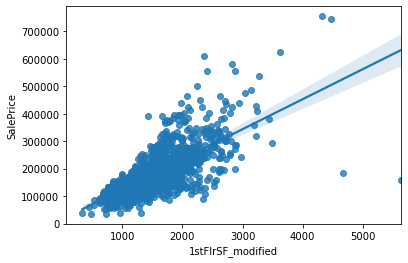

In [41]:
# let's be an engineer
# create a dummy variable to indicate the presence of 2nd floor

micro_df.head()

micro_df["more_than_1_floor"] = micro_df['2ndFlrSF']>0

# add the 2ndFlrSF values to 1stFlrSF
micro_df["1stFlrSF_modified"] = micro_df["1stFlrSF"]+ micro_df["2ndFlrSF"]

# drop the 2ndFlrSF
micro_df = micro_df.drop("2ndFlrSF",axis=1)

micro_df.head()

sns.regplot(x=micro_df["1stFlrSF_modified"],y='SalePrice', data = micro_df);

In [42]:
micro_df['2ndFlrSF']>0

KeyError: '2ndFlrSF'

In [ ]:
300 houses ==> 0 pool
250 houses ==> 2 pools

550 houses ===> salesprices 

corr(salesprice(250), num_pools)




